# Notebook 02: EDA Descriptive

## Cell 1 — Purpose + scope (descriptive only)

In [67]:
# Purpose:
# - Establish the role of this notebook as descriptive analysis supporting the report narrative.
# - Confirm that modelling is excluded here to avoid duplication with the core modelling notebook.
# - Define the unit of analysis and key outcome variable used throughout.

# Define the unit of analysis used in this notebook
unit_of_analysis = "lead"  # One row represents one lead record

# Define the outcome variable used for descriptive comparisons
outcome_var = "sale_flag"  # 1 indicates the lead matched to a sale record; 0 indicates no matched sale

# Confirm the notebook scope (descriptive analysis only)
analysis_scope = "EDA_descriptive_only"  # Ensures this notebook remains focused on descriptive profiling

# Print a short scope confirmation for traceability when the notebook is executed
print("Notebook 02 scope:", analysis_scope)  # Confirms this notebook is not used for modelling
print("Unit of analysis:", unit_of_analysis)  # Confirms lead-level granularity
print("Outcome variable:", outcome_var)       # Confirms conversion indicator used in comparisons

Notebook 02 scope: EDA_descriptive_only
Unit of analysis: lead
Outcome variable: sale_flag


## Cell 2 — Descriptive baseline: scale and class balance

In [69]:
# Cell 2 — Load lead-level dataset for descriptive analysis
# Purpose:
# - Import required library for data handling in this notebook.
# - Load the pre-constructed lead-level table created in Notebook 01.
# - Establish baseline scale and conversion rate for descriptive analysis.

import pandas as pd   # Provides DataFrame functionality used throughout this notebook

# Load lead-level dataset produced in Notebook 01
lead_model = pd.read_csv("lead_model_final.csv")  # Reuses the trusted, prepared dataset

# Establish descriptive baseline figures
total_leads = len(lead_model)                     # Total number of leads analysed
overall_conversion_rate = lead_model["sale_flag"].mean()  # Overall conversion benchmark

# Print baseline information
print("Total leads analysed:", total_leads)
print("Overall conversion rate:", f"{overall_conversion_rate:.2%}")

Total leads analysed: 159550
Overall conversion rate: 2.66%


## Cell 3 — Lead mix by lead source (volume only)

Top lead sources by lead volume:
              lead_source  leads
0   oursmartquotes.com.au  88016
1                 Tedirex  31869
2          Google Adwords  15084
3          Data4U October  10050
4                 organic   4093
5  Right Health Insurance   3303
6       Energy Deal Sales   1904
7         CHOOSE N SWITCH   1301
8        SEO_HOMEPAGE_NEW    772
9  comparingexpert.com.au    618


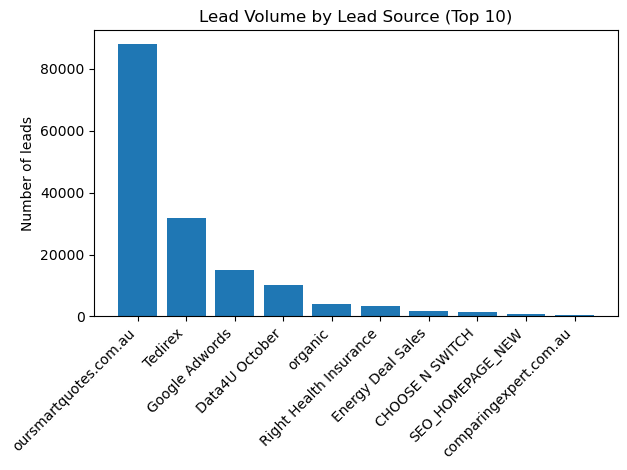

In [71]:
# Cell 3 — Lead mix by lead source (volume only)
# Purpose:
# - Describe how incoming leads are distributed across lead sources.
# - Identify which sources dominate operational workload.
# - Provide contextual background for later performance and allocation discussions.

import matplotlib.pyplot as plt   # Provides plotting functionality for descriptive visuals

# Compute lead counts by lead source
lead_source_volume = (
    lead_model
    .groupby("lead_source", dropna=False)      # Group leads by originating source
    .agg(
        leads=("lead_id", "count")             # Count total leads per source
    )
    .sort_values("leads", ascending=False)     # Rank sources by volume
    .reset_index()
)

# Display the top lead sources by volume
print("Top lead sources by lead volume:")
print(lead_source_volume.head(10))

# Plot lead volume by source (top sources only for readability)
top_n_sources = 10                             # Limit to top sources to avoid overcrowded chart

plt.figure()
plt.bar(
    lead_source_volume.head(top_n_sources)["lead_source"].astype(str),  # Lead source labels
    lead_source_volume.head(top_n_sources)["leads"]                      # Lead counts
)
plt.ylabel("Number of leads")
plt.title(f"Lead Volume by Lead Source (Top {top_n_sources})")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Cell 4 — Agent workload distribution (lead volume only)

Top agents by lead volume:
      user  leads
0  14019.0  10909
1  14017.0   9623
2  13444.0   8192
3  14128.0   7926
4  13276.0   7040
5   9090.0   6400
6  13621.0   6116
7  11302.0   5511
8  13652.0   5253
9  13216.0   5250


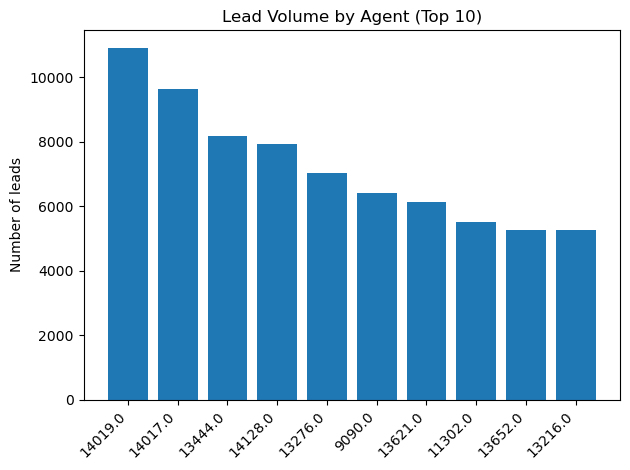

In [73]:
# Purpose:
# - Describe how leads are distributed across agents.
# - Identify concentration or imbalance in agent workload.
# - Provide operational context for later agent performance comparisons.

# Compute lead counts by agent
agent_volume = (
    lead_model
    .groupby("user", dropna=False)          # Group leads by assigned agent
    .agg(
        leads=("lead_id", "count")          # Count total leads handled by each agent
    )
    .sort_values("leads", ascending=False)  # Rank agents by workload
    .reset_index()
)

# Display top agents by workload
print("Top agents by lead volume:")
print(agent_volume.head(10))

# Plot agent workload distribution (top agents only for readability)
top_n_agents = 10                           # Limit to top agents to keep chart readable

plt.figure()
plt.bar(
    agent_volume.head(top_n_agents)["user"].astype(str),  # Agent identifiers
    agent_volume.head(top_n_agents)["leads"]              # Lead counts
)
plt.ylabel("Number of leads")
plt.title(f"Lead Volume by Agent (Top {top_n_agents})")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## Cell 5 — Lead mix by state (volume only)

Lead volume by state:
   state  leads
0     NS  52386
1     VI  39127
2     QL  35839
3     WA  13153
4     SA  11660
5     TA   3419
6    NaN   1687
7     AC   1588
8     NT    582
9     Vi     22
10    Ne     19
11    Qu     11
12    We      9
13    vi      7
14    So      6
15    No      4
16    ne      4
17    wa      3
18    ql      3
19    Ns      2
20    qu      2
21    ac      2
22    Un      2
23    Ql      2
24    30      1
25    ns      1
26    q1      1
27    Au      1
28    sA      1
29    sa      1
30    so      1
31    vc      1
32    Sa      1
33    we      1
34    22      1


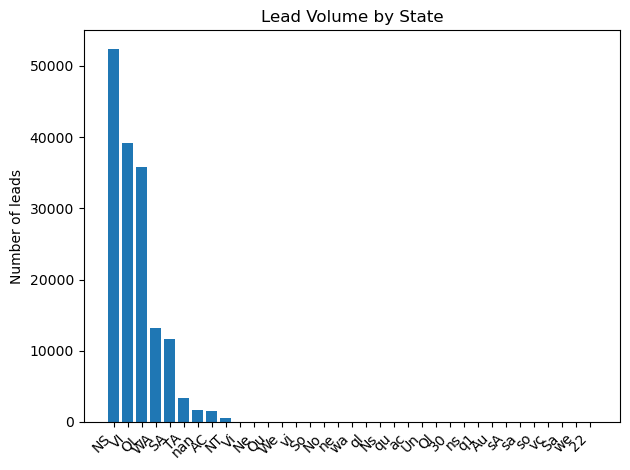

In [75]:
# Purpose:
# - Describe the geographic distribution of incoming leads.
# - Identify which states account for the largest share of operational workload.
# - Provide context for evaluating whether geographic routing is meaningful.

# Compute lead counts by state
state_volume = (
    lead_model
    .groupby("state", dropna=False)          # Group leads by customer state
    .agg(
        leads=("lead_id", "count")           # Count total leads per state
    )
    .sort_values("leads", ascending=False)   # Rank states by lead volume
    .reset_index()
)

# Display lead volume by state
print("Lead volume by state:")
print(state_volume)

# Plot lead volume by state
plt.figure()
plt.bar(
    state_volume["state"].astype(str),       # State labels
    state_volume["leads"]                    # Lead counts
)
plt.ylabel("Number of leads")
plt.title("Lead Volume by State")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## Cell 6 — Standardise state labels for descriptive analysis

Lead volume by cleaned state:
       state_clean  leads
0               NS  52389
1               VI  39156
2               QL  35844
3               WA  13156
4               SA  11663
5               TA   3419
6  Other / Unknown   1751
7               AC   1590
8               NT    582


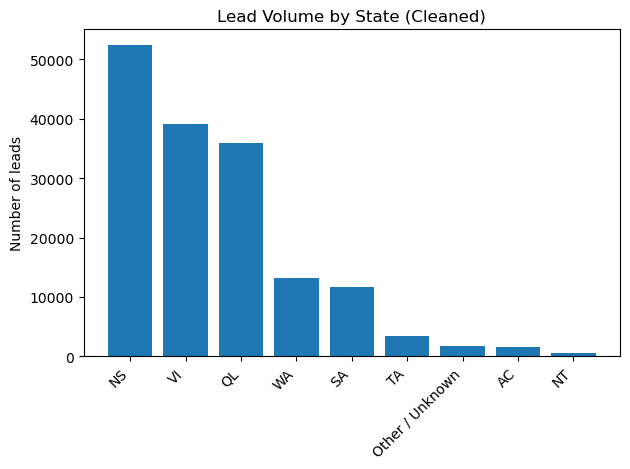

In [77]:
# Purpose:
# - Clean obvious inconsistencies in state labels for readability.
# - Preserve major state categories while grouping rare or malformed entries.
# - Ensure descriptive charts reflect meaningful geographic structure.

# Create a copy to avoid altering the original dataset
lead_model["state_clean"] = lead_model["state"].astype(str).str.upper().str.strip()

# Define valid Australian state codes used in the analysis
valid_states = {"NS", "VI", "QL", "WA", "SA", "TA", "NT", "AC"}

# Replace invalid or rare state values with a common category
lead_model.loc[
    ~lead_model["state_clean"].isin(valid_states),
    "state_clean"
] = "Other / Unknown"

# Recompute lead volume by cleaned state
state_volume_clean = (
    lead_model
    .groupby("state_clean")
    .agg(leads=("lead_id", "count"))
    .sort_values("leads", ascending=False)
    .reset_index()
)

# Display cleaned state distribution
print("Lead volume by cleaned state:")
print(state_volume_clean)

# Plot cleaned state distribution
plt.figure()
plt.bar(
    state_volume_clean["state_clean"],
    state_volume_clean["leads"]
)
plt.ylabel("Number of leads")
plt.title("Lead Volume by State (Cleaned)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


## Cell 7 — Create output directory for Notebook 02

In [79]:
# Purpose:
# - Create a dedicated folder for descriptive figures.
# - Keep Notebook 02 outputs separate from modelling outputs.

import os

output_dir_02 = "outputs_02_eda"
os.makedirs(output_dir_02, exist_ok=True)

print("Notebook 02 outputs will be saved to:", output_dir_02)

Notebook 02 outputs will be saved to: outputs_02_eda


## Cell 8 — Save lead volume by lead source figure

In [81]:
# Purpose:
# - Persist the lead source workload chart for report use.

plt.figure()
plt.bar(
    lead_source_volume.head(10)["lead_source"].astype(str),
    lead_source_volume.head(10)["leads"]
)
plt.ylabel("Number of leads")
plt.title("Lead Volume by Lead Source (Top 10)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

path = os.path.join(output_dir_02, "lead_volume_by_source.png")
plt.savefig(path)
plt.close()

print("Saved:", path)


Saved: outputs_02_eda/lead_volume_by_source.png


## Cell 9 — Save agent workload distribution figure

In [83]:
# Purpose:
# - Persist the agent workload chart for descriptive context.

plt.figure()
plt.bar(
    agent_volume.head(10)["user"].astype(str),
    agent_volume.head(10)["leads"]
)
plt.ylabel("Number of leads")
plt.title("Lead Volume by Agent (Top 10)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

path = os.path.join(output_dir_02, "lead_volume_by_agent.png")
plt.savefig(path)
plt.close()

print("Saved:", path)


Saved: outputs_02_eda/lead_volume_by_agent.png


## Cell 10 — Save cleaned state distribution figure

In [85]:
# Purpose:
# - Persist the cleaned geographic distribution chart.

plt.figure()
plt.bar(
    state_volume_clean["state_clean"],
    state_volume_clean["leads"]
)
plt.ylabel("Number of leads")
plt.title("Lead Volume by State (Cleaned)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

path = os.path.join(output_dir_02, "lead_volume_by_state_cleaned.png")
plt.savefig(path)
plt.close()

print("Saved:", path)


Saved: outputs_02_eda/lead_volume_by_state_cleaned.png


## Cell 11 — Save descriptive summary tables

In [87]:
# Purpose:
# - Persist key descriptive tables for reference or appendix use.

lead_source_volume.head(10).to_csv(
    os.path.join(output_dir_02, "lead_volume_by_source_top10.csv"),
    index=False
)

agent_volume.head(10).to_csv(
    os.path.join(output_dir_02, "lead_volume_by_agent_top10.csv"),
    index=False
)

state_volume_clean.to_csv(
    os.path.join(output_dir_02, "lead_volume_by_state_cleaned.csv"),
    index=False
)

print("Descriptive tables saved.")


Descriptive tables saved.
